In [1]:
#Loading file data
import pandas as pd
import numpy as np
df_filepath = "C:/Users/Akash Sitoke/Desktop/NiftyDS/NIFTY_50.csv"
df_data = pd.read_csv(df_filepath)
df_data.head()

FileNotFoundError: [Errno 2] File C:/Users/Akash Sitoke/Desktop/NiftyDS/NIFTY_50.csv does not exist: 'C:/Users/Akash Sitoke/Desktop/NiftyDS/NIFTY_50.csv'

In [64]:
#Features of data
df_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Turnover', 'P/E',
       'P/B', 'Div Yield'],
      dtype='object')

In [65]:
#viewing the data's mean 
df_data.describe()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
count,5061.000000,5061.000000,5061.000000,5061.000000,5.060000e+03,5.060000e+03,5061.000000,5061.000000,5061.000000
mean,5216.237977,5251.466667,5174.455009,5213.433768,1.664416e+08,6.826187e+10,20.037014,3.547459,1.428164
std,3274.529979,3283.745772,3257.303609,3270.073955,1.419567e+08,5.482144e+10,4.194021,0.799204,0.402380
min,853.000000,877.000000,849.950000,854.200000,1.394931e+06,4.012000e+08,10.680000,1.920000,0.590000
25%,1983.200000,1999.700000,1964.650000,1982.750000,7.772303e+07,3.017642e+10,17.110000,3.030000,1.180000
50%,5096.700000,5135.550000,5038.850000,5090.850000,1.370860e+08,5.793170e+10,20.090000,3.470000,1.330000
75%,7895.400000,7929.100000,7837.700000,7887.800000,1.983021e+08,8.493517e+10,22.860000,3.790000,1.550000
max,12430.500000,12430.500000,12321.400000,12362.300000,1.811564e+09,5.970553e+11,29.900000,6.550000,3.180000


In [66]:
#Data types of the Features
df_data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Turnover     float64
P/E          float64
P/B          float64
Div Yield    float64
dtype: object

In [67]:
#Identifying the missing data
missing_data = df_data.isnull()
missing_data.head(5)
#df_data.isnull()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [68]:
#Identifying the number of missing data in all columns 
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Date
False    5061
Name: Date, dtype: int64

Open
False    5061
Name: Open, dtype: int64

High
False    5061
Name: High, dtype: int64

Low
False    5061
Name: Low, dtype: int64

Close
False    5061
Name: Close, dtype: int64

Volume
False    5060
True        1
Name: Volume, dtype: int64

Turnover
False    5060
True        1
Name: Turnover, dtype: int64

P/E
False    5061
Name: P/E, dtype: int64

P/B
False    5061
Name: P/B, dtype: int64

Div Yield
False    5061
Name: Div Yield, dtype: int64



In [ ]:
#True means data is missing and false means data is not missing
#so data is missing in Volume and Turnover
#we will deal with the missing data by taking the average value of both th columns

In [69]:
#Averaging the volume
avg_vol = df_data["Volume"].astype("float").mean(axis=0)
print("Average Volume:", avg_vol)

Average Volume: 166441646.00790513


In [70]:
#Averaging the Turnover
avg_tur = df_data["Turnover"].astype("float").mean(axis=0)
print("Average Turnover:", avg_tur)

Average Turnover: 68261867766.798416


In [71]:
#Replacing the missing or nan value by the average value in volume column
df_data["Volume"].replace(np.nan, avg_vol, inplace=True)

In [72]:
#Replacing the missing or nan value by the average value in turnover column
df_data["Turnover"].replace(np.nan, avg_tur, inplace=True)

In [73]:
#Rechecking the missing values in the columns
missing_data = df_data.isnull()
missing_data.head(5) 

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [74]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 
    
#So there is no missing values now

Date
False    5061
Name: Date, dtype: int64

Open
False    5061
Name: Open, dtype: int64

High
False    5061
Name: High, dtype: int64

Low
False    5061
Name: Low, dtype: int64

Close
False    5061
Name: Close, dtype: int64

Volume
False    5061
Name: Volume, dtype: int64

Turnover
False    5061
Name: Turnover, dtype: int64

P/E
False    5061
Name: P/E, dtype: int64

P/B
False    5061
Name: P/B, dtype: int64

Div Yield
False    5061
Name: Div Yield, dtype: int64



In [75]:
#converting the data type of datetime from object to timestamp
df_data["Date"]= pd.to_datetime(df_data["Date"])
df_data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
Turnover            float64
P/E                 float64
P/B                 float64
Div Yield           float64
dtype: object

In [76]:
#Adding a month column for monthwise analysis And column year for yearwise analysis
df_data['month'] = df_data['Date'].dt.month
df_data['year'] = df_data['Date'].dt.year

In [77]:
df_data.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,month,year
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95,1,2000
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92,1,2000
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95,1,2000
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94,1,2000
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94,1,2000


In [78]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5061 entries, 0 to 5060
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5061 non-null   datetime64[ns]
 1   Open       5061 non-null   float64       
 2   High       5061 non-null   float64       
 3   Low        5061 non-null   float64       
 4   Close      5061 non-null   float64       
 5   Volume     5061 non-null   float64       
 6   Turnover   5061 non-null   float64       
 7   P/E        5061 non-null   float64       
 8   P/B        5061 non-null   float64       
 9   Div Yield  5061 non-null   float64       
 10  month      5061 non-null   int64         
 11  year       5061 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 474.6 KB


In [79]:
#Now lets view the correlation between all the columns
df_data.corr()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield,month,year
Open,1.000000,0.999907,0.999872,0.999806,0.630781,0.786228,0.779209,0.040235,-0.441034,0.009984,0.964209
High,0.999907,1.000000,0.999817,0.999906,0.633668,0.788951,0.779414,0.041780,-0.441819,0.009695,0.964528
Low,0.999872,0.999817,1.000000,0.999893,0.627235,0.783148,0.779686,0.039617,-0.440974,0.010616,0.963935
Close,0.999806,0.999906,0.999893,1.000000,0.630549,0.786192,0.779778,0.041100,-0.441622,0.010379,0.964263
Volume,0.630781,0.633668,0.627235,0.630549,1.000000,0.908835,0.443241,-0.127147,-0.147992,-0.010546,0.639633
Turnover,0.786228,0.788951,0.783148,0.786192,0.908835,1.000000,0.622710,-0.002736,-0.286845,-0.021521,0.760437
P/E,0.779209,0.779414,0.779686,0.779778,0.443241,0.622710,1.000000,0.434942,-0.703850,-0.034530,0.625012
P/B,0.040235,0.041780,0.039617,0.041100,-0.127147,-0.002736,0.434942,1.000000,-0.539224,-0.060146,-0.111238
Div Yield,-0.441034,-0.441819,-0.440974,-0.441622,-0.147992,-0.286845,-0.703850,-0.539224,1.000000,0.031973,-0.320718
month,0.009984,0.009695,0.010616,0.010379,-0.010546,-0.021521,-0.034530,-0.060146,0.031973,1.000000,-0.037187


In [80]:
# Importing all the Vizualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [81]:
# We can view a positive relation between volume and turnover 
df_data[["Volume", "Turnover"]].corr()

,Volume,Turnover
Volume,1.000000,0.908835
Turnover,0.908835,1.000000


(0.0, 745988236986.5516)

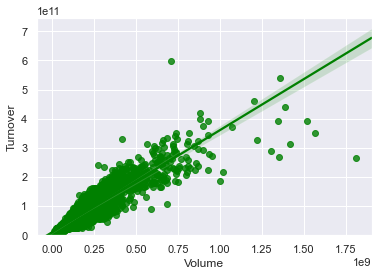

In [82]:
# So we can view this in regression relation plot
sns.regplot(x="Volume", y="Turnover",color='green', data=df_data,truncate=False)
plt.ylim(0,)

In [83]:
# We can view a negative relation between volume and turnover 
df_data[["Volume", "Div Yield"]].corr()

,Volume,Div Yield
Volume,1.000000,-0.147992
Div Yield,-0.147992,1.000000


(0.0, 3.3114529743850154)

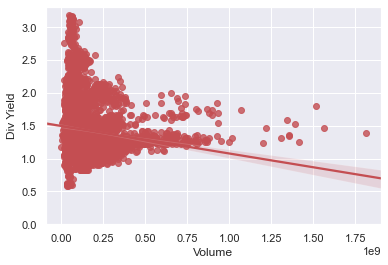

In [84]:
sns.regplot(x="Volume", y="Div Yield", color='r',data=df_data,truncate=False)
plt.ylim(0,)

In [85]:
df_ohlc=df_data[['Date','Open', 'High','Low', 'Close']]
df_ohlc.head()
#import seaborn as sns; sns.set(style="ticks", color_codes=True)

,Date,Open,High,Low,Close
0,2000-01-03,1482.15,1592.90,1482.15,1592.2
1,2000-01-04,1594.40,1641.95,1594.40,1638.7
2,2000-01-05,1634.55,1635.50,1555.05,1595.8
3,2000-01-06,1595.80,1639.00,1595.80,1617.6
4,2000-01-07,1616.60,1628.25,1597.20,1613.3


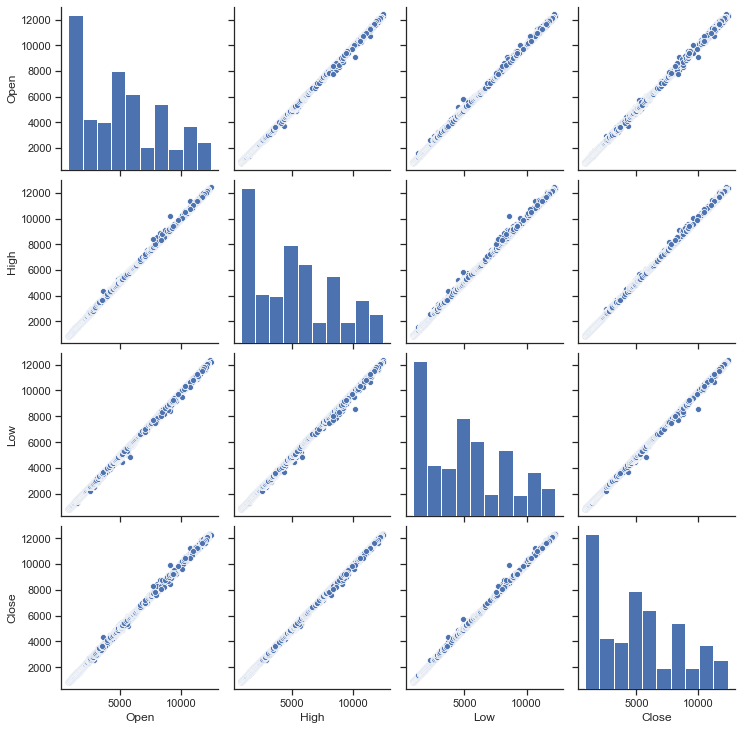

In [96]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df_ohlc)

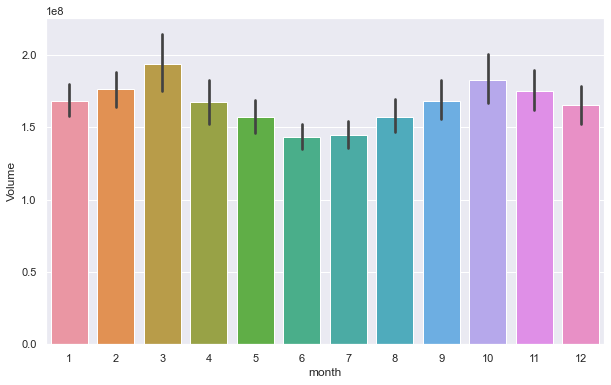

In [95]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
#sns.barplot(x='abbr', y='views', data=pop_talks)
sns.barplot(x='month', y='Volume', data=df_data)

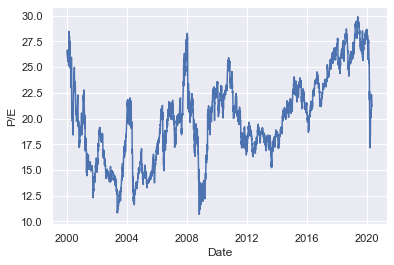

In [88]:
ax = sns.lineplot(x="Date", y="P/E", data=df_data)

In [93]:
month_df = pd.DataFrame(df_data['month'].value_counts()).reset_index()
month_df.columns = ['month', 'Volume']

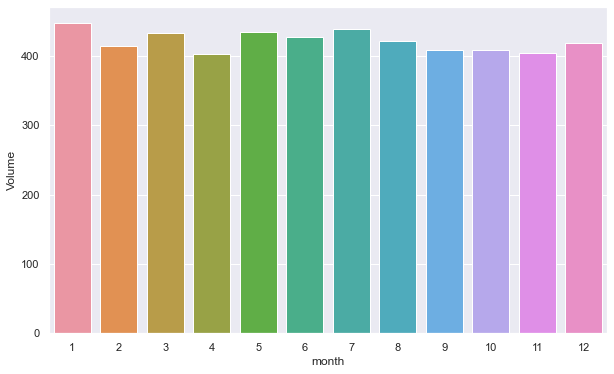

In [94]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
#sns.barplot(x='abbr', y='views', data=pop_talks)
sns.barplot(x='month', y='Volume', data=month_df)